In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
tdoc = pdr.get_data_yahoo('TDOC','2019-05-31')
tdoc.drop('Adj Close', axis=1, inplace=True)
tdoc.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-31,58.900002,56.150002,57.099998,58.119999,627000
2019-06-03,58.000000,53.459999,58.000000,53.980000,2052300
2019-06-04,55.919998,53.820000,54.500000,55.750000,1825900
2019-06-05,56.500000,53.880001,56.450001,55.139999,943400
2019-06-06,55.695999,54.009998,55.150002,54.270000,716500


In [2]:
tdoc['3-day'] = tdoc['Close'].rolling(3).mean()
tdoc['9-day'] = tdoc['Close'].rolling(9).mean()
tdoc['21-day'] = tdoc['Close'].rolling(21).mean()
tdoc['Change'] = np.log(tdoc.Close / tdoc.Close.shift())
tdoc.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change
Date,,,,,,,,,
2021-05-28,156.710007,150.240005,150.869995,150.580002,3100800,149.300003,143.644446,146.825239,0.010548
2021-06-01,156.270004,150.389999,153.869995,152.360001,2722600,150.646667,145.085558,145.873334,0.011752
2021-06-02,154.445007,151.059998,151.300003,152.740005,1902000,151.893336,146.844447,145.374762,0.002491
2021-06-03,152.509995,146.009995,151.490005,146.589996,2831700,150.563334,147.433336,144.813810,-0.041098
2021-06-04,149.679993,145.139999,147.179993,146.570007,2258400,148.633336,148.105559,144.317620,-0.000136


In [3]:
tdoc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-31 to 2021-06-04
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    int64  
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.7 KB


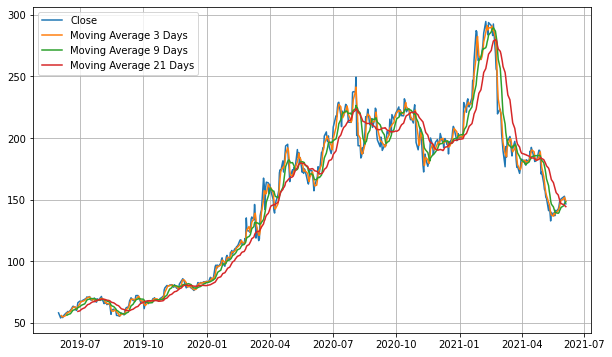

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'],label='Close')
plt.plot(tdoc['3-day'],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on 2019

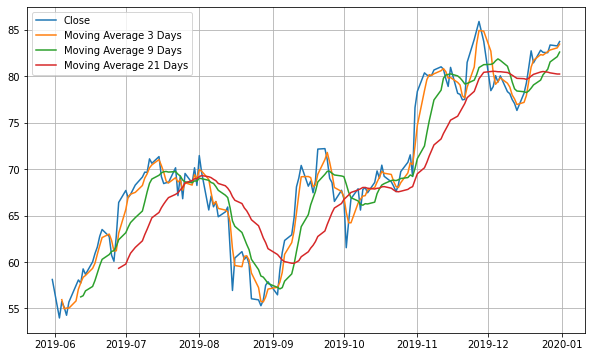

In [5]:
start='20190531'
end= '20200101'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

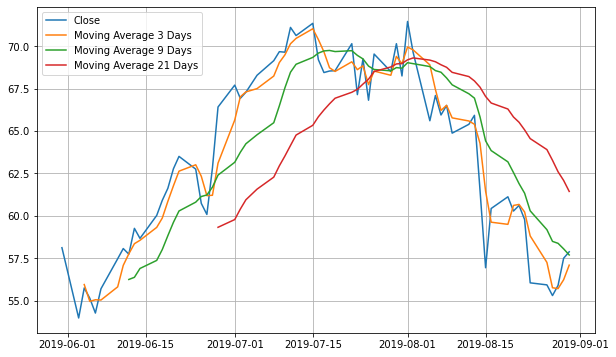

In [6]:
start='20190531'
end= '20190831'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

## 2020 First Half

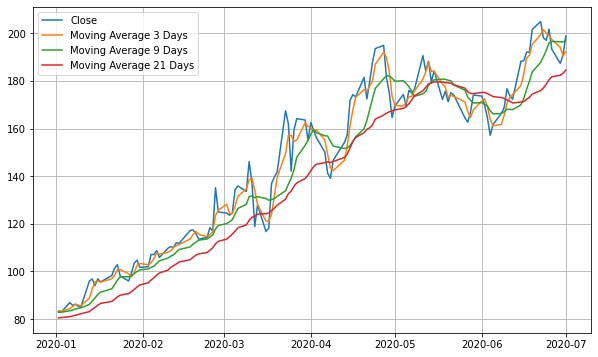

In [7]:
start='20200101'
end= '20200701'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

In [8]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-9-21'] = np.where(tdoc['9-day'] > tdoc['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-9-21'] = np.where(tdoc['9-day'] < tdoc['21-day'],-1,tdoc['position-9-21'])

<AxesSubplot:xlabel='Date'>

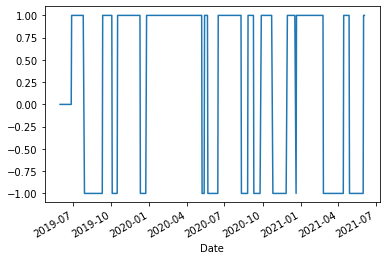

In [9]:
tdoc['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

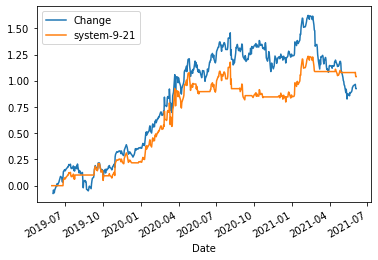

In [10]:
# Whether we are making money with this system
tdoc['system-9-21'] = np.where(tdoc['position-9-21'] > 0, tdoc['position-9-21']* tdoc['Change'],0)
tdoc[['Change','system-9-21']].cumsum().plot()

In [11]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-3-9'] = np.where(tdoc['3-day'] > tdoc['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-3-9'] = np.where(tdoc['3-day'] < tdoc['9-day'],-1,tdoc['position-3-9'])


<AxesSubplot:xlabel='Date'>

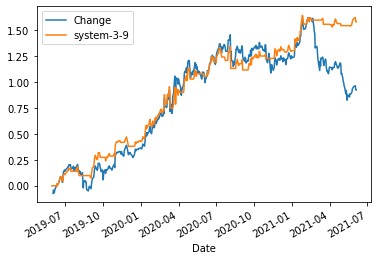

In [12]:
# Whether we are making money with this system
tdoc['system-3-9'] = np.where(tdoc['position-3-9'] > 0, tdoc['position-3-9']* tdoc['Change'],0)
tdoc[['Change','system-3-9']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

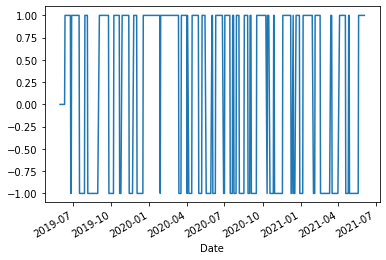

In [13]:
tdoc['position-3-9'].plot()

In [14]:
tdoc['position-3-9'].diff()[tdoc['position-3-9'].diff() != 0].index.values

array(['2019-05-31T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-26T00:00:00.000000000', '2019-06-28T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-09-03T00:00:00.000000000',
       '2019-09-26T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
       '2019-10-22T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-04-02T00:00:00.000000000', '2020-04-03T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
       '2020-04-30T00:00:00.000000000', '2020-05-08T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-06-01

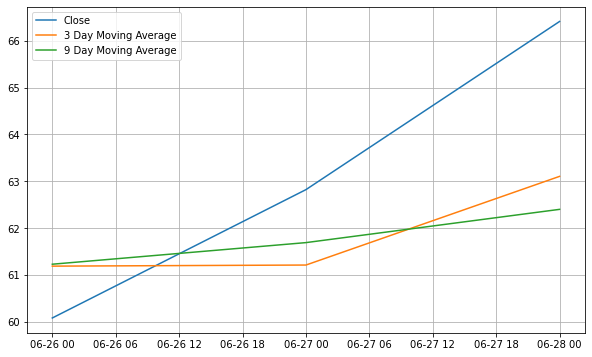

In [15]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:finish],label='Close')
plt.plot(tdoc['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(tdoc['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

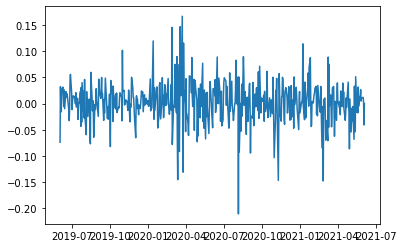

In [16]:
plt.plot(tdoc.Change)

In [17]:
tdoc['Volatility'] = tdoc.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

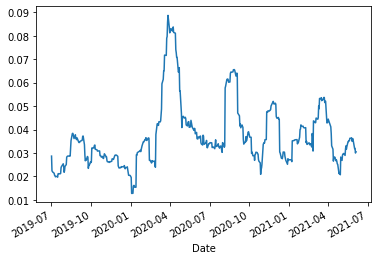

In [18]:
tdoc.Volatility.plot()

## Prepare data for DGIM processing

In [19]:
bit_depth = 16
num_buckets = 5
tdoc_list = tdoc['Close'].tolist()
tdoc_3day_list = tdoc['3-day'].tolist()
tdoc_9day_list = tdoc['9-day'].tolist()
tdoc_21day_list = tdoc['21-day'].tolist()
tdoc_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in tdoc_list ]
print(tdoc_list[0],tdoc_list_bin[0], len(tdoc_list_bin))

58.119998931884766 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0] 508


In [20]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0]
0 nan 19.333333333333332 nan
1 nan 37.333333333333336 nan
2 55.949999491373696 40.0 -28.50759541799969
3 54.95666631062826 39.0 -29.03499681082792
4 55.0533332824707 39.0 -29.159602743948977
5 55.03666687011719 39.0 -29.138150585976867
6 55.813334147135414 39.666666666666664 -28.92976692254725
7 57.08000055948893 38.333333333333336 -32.84279439804449
8 57.76000086466471 39.0 -32.47922538751439
9 58.356666564941406 39.0 -33.1695891906379
10 58.5566660563151 39.333333333333336 -32.828598377671135
11 59.31666564941406 40.666666666666664 -31.441414952378775
12 59.86666615804037 41.333333333333336 -30.957683155065617
13 60.84999974568685 41.0 -32.621199389723664
14 61.766666412353516 42.0 -32.0021583816609
15 62.62999979654948 63.0 0.5907715226767539
16 63.006666819254555 63.333333333333336 0.5184634112067533
17 62.326666514078774 62.666666666666664 0.5455131352341602
18 61.186667124430336 41.333333333333336 -32.447156748581996
19 61.210000356038414 41.3333

201 123.96999613444011 124.0 0.024202521977457512
202 131.5999984741211 131.66666666666666 0.05065972136669411
203 139.43333435058594 94.33333333333333 -32.34520728296926
204 149.60333760579428 105.66666666666667 -29.368777222672
205 157.0666707356771 113.66666666666667 -27.63158082216374
206 157.19000244140625 113.66666666666667 -27.688361281731787
207 154.5433349609375 112.0 -27.528417819953727
208 155.2566680908203 112.66666666666667 -27.431994997625363
209 162.40666707356772 109.33333333333333 -32.67928262833754
210 160.90999857584634 118.33333333333333 -26.459925187584993
211 160.36666361490884 118.0 -26.41862258645265
212 158.95333353678384 115.33333333333333 -27.44201661763595
213 159.35333760579428 116.66666666666667 -26.787434502768438
214 155.22000630696616 105.66666666666667 -31.924582931855973
215 149.19667053222656 105.0 -29.623094385796
216 143.49333699544272 100.66666666666667 -29.845755367816277
217 142.336669921875 99.33333333333333 -30.21240879960527
218 146.630004882

416 265.19666544596356 263.3333333333333 -0.7026227533807051
417 278.77333577473956 191.33333333333334 -31.36598491329937
418 282.4200032552083 191.0 -32.37022951685076
419 274.336669921875 188.33333333333334 -31.349559143162853
420 266.8699951171875 181.66666666666666 -31.92690448887163
421 263.5899963378906 178.33333333333334 -32.34442284951835
422 264.92999267578125 177.0 -33.18989737163852
423 267.4566650390625 179.33333333333334 -32.948639246981784
424 271.7033284505208 186.0 -31.54298069857029
425 277.75999959309894 190.66666666666666 -31.35560665827282
426 285.4700012207031 198.66666666666666 -30.407165090151416
427 289.35666910807294 204.0 -29.498773735259146
428 291.1566670735677 195.0 -33.0257479727474
429 287.5399983723958 202.0 -29.748904102591023
430 289.25999959309894 204.0 -29.475212512284415
431 289.51999918619794 204.33333333333334 -29.42341326758529
432 290.9099934895833 195.0 -32.96895797188129
433 287.38999430338544 202.0 -29.71223633250183
434 287.8233337402344 202

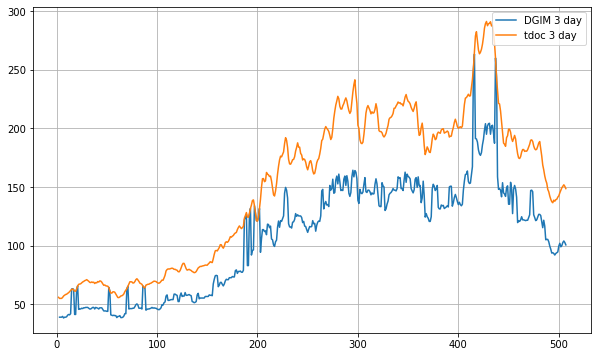

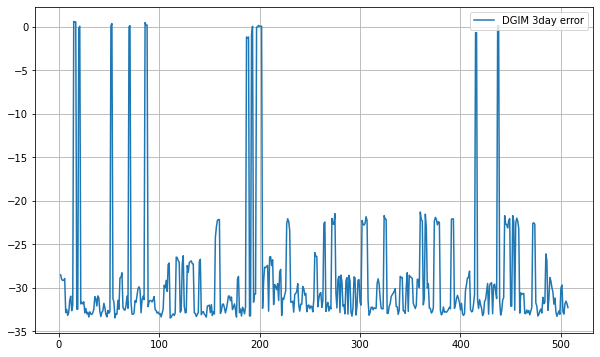

In [21]:
print(tdoc_list_bin[0])
dgim_3day = DGIMMovingAverage(tdoc_list_bin, 3, num_buckets, bit_depth, tdoc_3day_list, False)
tdoc['3-day-dgim'] = dgim_3day.mov_avg
tdoc.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), tdoc_3day_list, label = "tdoc 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 6.444444444444445 nan
1 nan 12.444444444444445 nan
2 nan 13.333333333333334 nan
3 nan 19.22222222222222 nan
4 nan 24.77777777777778 nan
5 nan 30.11111111111111 nan
6 nan 31.11111111111111 nan
7 nan 37.55555555555556 nan
8 56.2488890753852 44.0 -21.776232876295822
9 56.375555674235024 44.0 -21.951988811865405
10 56.89666663275825 44.111111111111114 -22.471537048333605
11 57.37111112806532 44.111111111111114 -23.112677715714593
12 58.01222229003906 44.77777777777778 -22.813200373697274
13 58.82888878716363 45.666666666666664 -22.37373914730298
14 59.61444430881076 46.44444444444444 -22.09196112966174
15 60.284444173177086 47.22222222222222 -21.667649308387848
16 60.8044442070855 47.77777777777778 -21.42387221720503
17 61.136666191948784 48.111111111111114 -21.305635213967605
18 61.22777769300673 47.77777777777778 -21.96715350778634
19 61.68888897365994 48.22222222222222 -21.82997128897515
20 62.39888932969835 48.888888888888886 -21.651027103104965
21 63.1533334520128 48.77777777777

189 120.1022220187717 93.88888888888889 -21.825851919530457
190 120.7933332655165 93.77777777777777 -22.365104726728323
191 121.76444413926866 94.77777777777777 -22.16301035351893
192 124.07444424099393 97.0 -21.821128763959106
193 126.47888776991103 97.66666666666667 -22.780261284127693
194 128.1611090766059 99.44444444444444 -22.40669173282248
195 131.4066653781467 102.66666666666667 -21.871035710993368
196 131.6566653781467 103.33333333333333 -21.513025537645643
197 130.97222137451172 102.66666666666667 -21.61187648097228
198 131.3566657172309 103.11111111111111 -21.502947301451357
199 130.59666527642145 102.33333333333333 -21.641694972276536
200 129.88555399576822 102.44444444444444 -21.12714517290955
201 130.1744418674045 101.88888888888889 -21.728960441656625
202 130.5888875325521 102.33333333333333 -21.637028029797296
203 131.5 103.22222222222223 -21.504013519222642
204 133.87444390190973 105.55555555555556 -21.153319125720156
205 136.61000061035156 108.33333333333333 -20.698826

328 195.6477796766493 152.22222222222223 -22.19578342580595
329 196.4411129421658 152.11111111111111 -22.566560109087693
330 197.53111267089844 153.22222222222223 -22.43134757333045
331 199.1433342827691 154.55555555555554 -22.389792200577574
332 200.37444559733072 154.11111111111111 -23.088440418789563
333 201.9344448513455 157.44444444444446 -22.03190269973627
334 204.78333367241754 158.55555555555554 -22.573994322609497
335 207.0477769639757 160.77777777777777 -22.347498661745334
336 209.69444274902344 163.33333333333334 -22.1088879647508
337 211.91222127278647 165.55555555555554 -21.875409279749736
338 213.6066657172309 165.55555555555554 -22.495136095277402
339 215.71111043294272 167.66666666666666 -22.272586548670823
340 216.81444464789496 168.77777777777777 -22.155658008915584
341 217.75888909233942 169.0 -22.39122788308471
342 219.858890109592 171.0 -22.22284033419688
343 220.1344451904297 171.22222222222223 -22.219250115944106
344 220.47000122070312 171.66666666666666 -22.1360

487 171.11111111111111 134.66666666666666 -21.298701298701307
488 166.77555508083768 130.33333333333334 -21.851057086777764
489 161.34222242567273 124.88888888888889 -22.593796582650395
490 156.83999972873264 121.33333333333333 -22.638782489677975
491 153.41999986436633 121.44444444444444 -20.841842946285
492 149.0155554877387 117.11111111111111 -21.41014357340214
493 146.40110948350696 114.11111111111111 -22.055842668346394
494 144.06666564941406 112.44444444444444 -21.94971408717283
495 142.1111094156901 110.22222222222223 -22.439404860452875
496 140.44555494520398 110.33333333333333 -21.440494591387523
497 139.36222161187067 108.55555555555556 -22.10546423557519
498 139.30333285861545 108.55555555555556 -22.072535288345936
499 138.91888936360678 108.11111111111111 -22.176810075021027
500 139.40555657280817 108.55555555555556 -22.129678167555966
501 141.14000108506946 110.22222222222223 -21.905752178797364
502 142.1755574544271 110.33333333333333 -22.39641235892496
503 143.6444464789

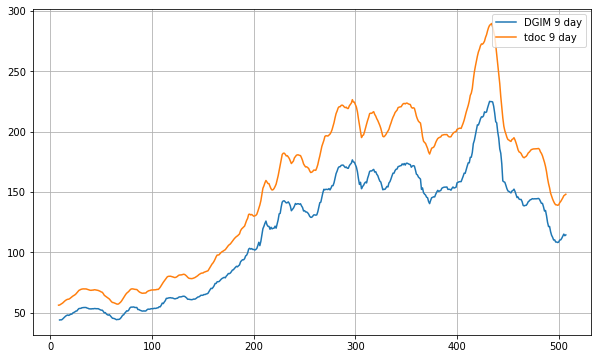

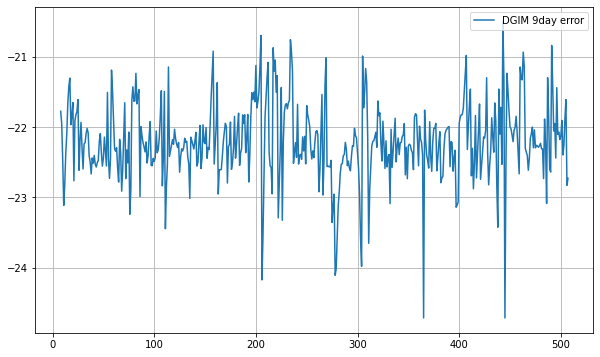

In [22]:
dgim_9day = DGIMMovingAverage(tdoc_list_bin, 9, num_buckets, bit_depth, tdoc_9day_list, False)
tdoc['9-day-dgim'] = dgim_9day.mov_avg
tdoc.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), tdoc_9day_list, label = "tdoc 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 2.761904761904762 nan
1 nan 5.333333333333333 nan
2 nan 5.714285714285714 nan
3 nan 8.238095238095237 nan
4 nan 10.619047619047619 nan
5 nan 12.904761904761905 nan
6 nan 13.333333333333334 nan
7 nan 16.095238095238095 nan
8 nan 18.857142857142858 nan
9 nan 21.142857142857142 nan
10 nan 23.952380952380953 nan
11 nan 26.80952380952381 nan
12 nan 29.714285714285715 nan
13 nan 32.666666666666664 nan
14 nan 30.904761904761905 nan
15 nan 33.95238095238095 nan
16 nan 36.904761904761905 nan
17 nan 39.80952380952381 nan
18 nan 41.904761904761905 nan
19 nan 44.904761904761905 nan
20 59.32285726638067 48.04761904761905 -19.006566336027618
21 59.77904764811198 45.476190476190474 -23.926204472367896
22 60.395238058907644 46.095238095238095 -23.677363353915045
23 60.944285619826545 47.38095238095238 -22.255299411470514
24 61.56999987647647 48.0 -22.03995436690109
25 62.278095063709074 50.23809523809524 -19.332639852418716
26 62.94333303542364 50.904761904761905 -19.12604647721244
27 63.5228567

186 109.88666607084728 88.61904761904762 -19.354139325773865
187 111.58809443882534 90.33333333333333 -19.047516863140146
188 112.61095137823196 91.38095238095238 -18.852517217418168
189 113.5509512765067 92.28571428571429 -18.727484668102562
190 114.59237997872489 93.33333333333333 -18.551885081135847
191 115.67095147995721 94.42857142857143 -18.364489769989085
192 116.96523720877511 95.33333333333333 -18.494301718749377
193 118.33857036772228 90.61904761904762 -23.42391213831612
194 119.51952253069196 91.85714285714286 -23.144653766873567
195 121.43523733956474 93.76190476190476 -22.788552304861962
196 122.75428481329055 95.38095238095238 -22.299288757189252
197 123.1528563726516 94.28571428571429 -23.44009139307937
198 124.00761813209171 98.57142857142857 -20.511795923351062
199 124.23238009498233 98.80952380952381 -20.463953331668748
200 124.54047539120629 98.71428571428571 -20.737185718775685
201 125.47809419177827 101.19047619047619 -19.356062233604984
202 126.53857058570499 102.

359 220.1509537469773 179.04761904761904 -18.67052311142787
360 218.66523887997582 176.0 -19.511669572407225
361 217.23809596470423 176.0952380952381 -18.93906208612269
362 216.33428664434524 175.1904761904762 -19.018626724440445
363 215.65142894926527 174.52380952380952 -19.071341018162947
364 214.92095293317522 173.8095238095238 -19.128627787367982
365 213.01000031970796 170.38095238095238 -20.012697936610202
366 210.84047662644159 168.1904761904762 -20.22856384997217
367 208.49523853120348 165.85714285714286 -20.450393003905166
368 206.42571512858072 163.8095238095238 -20.644807403240282
369 204.46000090099517 161.85714285714286 -20.83676897980731
370 202.3509536016555 165.85714285714286 -18.034909198576702
371 200.23904854910714 162.1904761904762 -19.001574685019445
372 198.31714375813803 160.28571428571428 -19.177076046842327
373 197.0990484328497 158.85714285714286 -19.402379605468063
374 196.39428638276598 159.85714285714286 -18.60397478896786
375 195.3319048200335 158.619047619

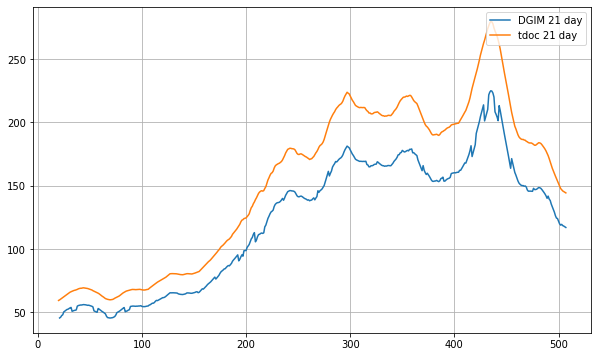

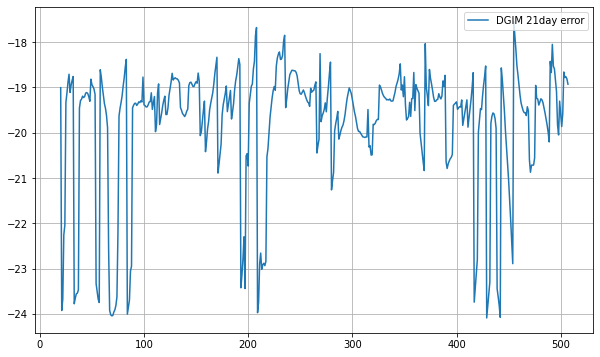

In [23]:
dgim_21day = DGIMMovingAverage(tdoc_list_bin, 21, num_buckets, bit_depth, tdoc_21day_list, False)
tdoc['21-day-dgim'] = dgim_21day.mov_avg
tdoc.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), tdoc_21day_list, label = "tdoc 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)

In [24]:
tdoc.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change,position-9-21,system-9-21,position-3-9,system-3-9,Volatility,3-day-dgim,9-day-dgim,21-day-dgim
Date,,,,,,,,,,,,,,,,,
2021-05-28,156.710007,150.240005,150.869995,150.580002,3100800,149.300003,143.644446,146.825239,0.010548,-1,0.000000,1,0.010548,0.036135,100.000000,111.666667,119.428571
2021-06-01,156.270004,150.389999,153.869995,152.360001,2722600,150.646667,145.085558,145.873334,0.011752,-1,0.000000,1,0.011752,0.031898,102.666667,113.333333,118.476190
2021-06-02,154.445007,151.059998,151.300003,152.740005,1902000,151.893336,146.844447,145.374762,0.002491,1,0.002491,1,0.002491,0.031976,104.000000,115.111111,118.095238
2021-06-03,152.509995,146.009995,151.490005,146.589996,2831700,150.563334,147.433336,144.813810,-0.041098,1,-0.041098,1,-0.041098,0.030001,102.666667,113.777778,117.571429
2021-06-04,149.679993,145.139999,147.179993,146.570007,2258400,148.633336,148.105559,144.317620,-0.000136,1,-0.000136,1,-0.000136,0.030585,100.666667,114.444444,117.000000


## 9/21 DGIM Comparison

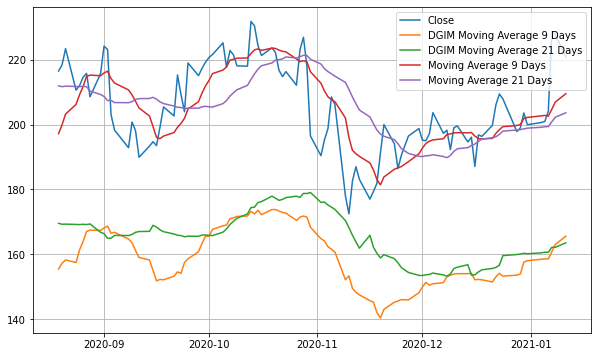

In [26]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][-200:-100],label='Close')
plt.plot(tdoc['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(tdoc['21-day-dgim'][-200:-100],label='DGIM Moving Average 21 Days')
plt.plot(tdoc['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

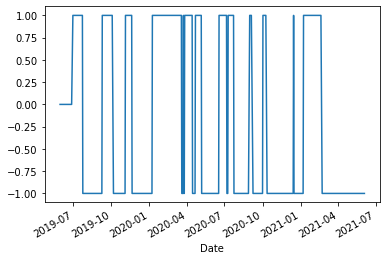

In [27]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-dgim-9-21'] = np.where(tdoc['9-day-dgim'] > tdoc['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-dgim-9-21'] = np.where(tdoc['9-day-dgim'] < tdoc['21-day-dgim'],-1,tdoc['position-dgim-9-21'])
tdoc['position-dgim-9-21'].plot()

,Change,system-dgim-9-21
Date,,
2021-05-28,0.951985,0.800667
2021-06-01,0.963736,0.800667
2021-06-02,0.966227,0.800667
2021-06-03,0.925130,0.800667
2021-06-04,0.924993,0.800667


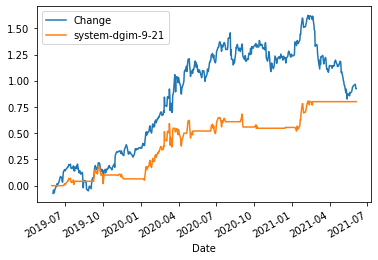

In [28]:
# Whether we are making money with this system
tdoc['system-dgim-9-21'] = np.where(tdoc['position-dgim-9-21'] > 0, tdoc['position-dgim-9-21']* tdoc['Change'],0)
tdoc[['Change','system-dgim-9-21']].cumsum().plot()
tdoc[['Change','system-dgim-9-21']].cumsum().tail()

,system-9-21,system-dgim-9-21
Date,,
2021-05-28,1.078037,0.800667
2021-06-01,1.078037,0.800667
2021-06-02,1.080528,0.800667
2021-06-03,1.039431,0.800667
2021-06-04,1.039294,0.800667


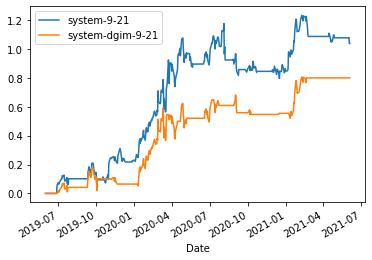

In [29]:
tdoc[['system-9-21','system-dgim-9-21']].cumsum().plot()
tdoc[['system-9-21','system-dgim-9-21']].cumsum().tail()

## 3/9 DGIM comparison

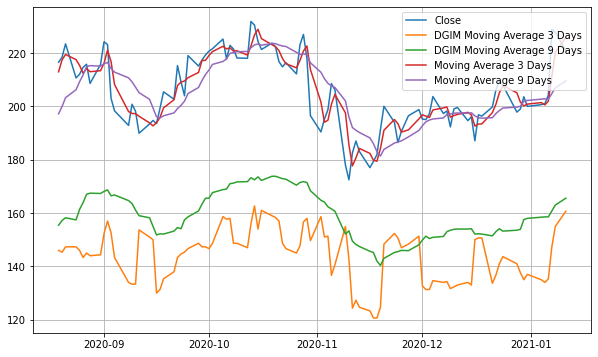

In [30]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][-200:-100],label='Close')
plt.plot(tdoc['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(tdoc['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(tdoc['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

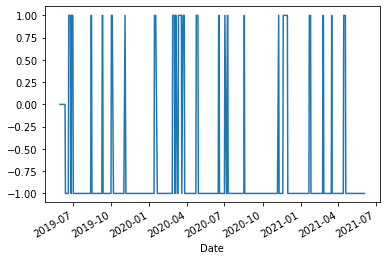

In [31]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-dgim-3-9'] = np.where(tdoc['3-day-dgim'] > tdoc['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-dgim-3-9'] = np.where(tdoc['3-day-dgim'] < tdoc['9-day-dgim'],-1,tdoc['position-dgim-3-9'])
tdoc['position-dgim-3-9'].plot()

,Change,system-dgim-3-9
Date,,
2021-05-28,0.951985,0.248254
2021-06-01,0.963736,0.248254
2021-06-02,0.966227,0.248254
2021-06-03,0.925130,0.248254
2021-06-04,0.924993,0.248254


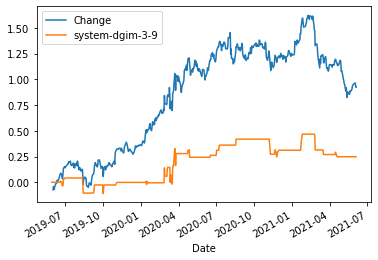

In [32]:
# Whether we are making money with this system
tdoc['system-dgim-3-9'] = np.where(tdoc['position-dgim-3-9'] > 0, tdoc['position-dgim-3-9']* tdoc['Change'],0)
tdoc[['Change','system-dgim-3-9']].cumsum().plot()
tdoc[['Change','system-dgim-3-9']].cumsum().tail()

,system-3-9,system-dgim-3-9
Date,,
2021-05-28,1.608783,0.248254
2021-06-01,1.620535,0.248254
2021-06-02,1.623026,0.248254
2021-06-03,1.581928,0.248254
2021-06-04,1.581792,0.248254


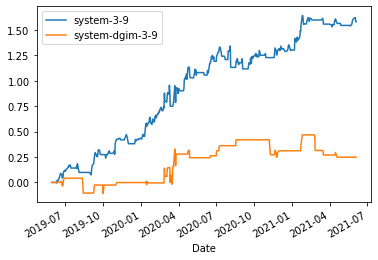

In [33]:
tdoc[['system-3-9','system-dgim-3-9']].cumsum().plot()
tdoc[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

,system-9-21,system-dgim-3-9
Date,,
2021-05-28,1.078037,0.248254
2021-06-01,1.078037,0.248254
2021-06-02,1.080528,0.248254
2021-06-03,1.039431,0.248254
2021-06-04,1.039294,0.248254


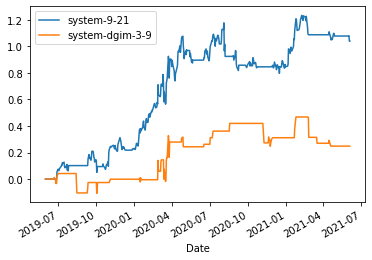

In [34]:
tdoc[['system-9-21','system-dgim-3-9']].cumsum().plot()
tdoc[['system-9-21','system-dgim-3-9']].cumsum().tail()

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

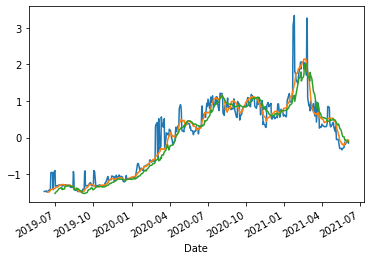

In [35]:
from sklearn import preprocessing

df3 = tdoc['3-day-dgim']
df9 = tdoc['9-day-dgim']
df21 = tdoc['21-day-dgim']

tdoc['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
tdoc['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
tdoc['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

tdoc['3-day-dgim-norm'].plot()
tdoc['9-day-dgim-norm'].plot()
tdoc['21-day-dgim-norm'].plot()

<AxesSubplot:xlabel='Date'>

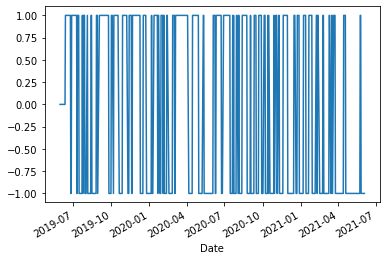

In [36]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-dgim-3-9-norm'] = np.where(tdoc['3-day-dgim-norm'] > tdoc['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-dgim-3-9-norm'] = np.where(tdoc['3-day-dgim-norm'] < tdoc['9-day-dgim-norm'],-1,tdoc['position-dgim-3-9-norm'])
tdoc['position-dgim-3-9-norm'].plot()

,Change,system-dgim-3-9-norm
Date,,
2021-05-28,0.951985,0.860266
2021-06-01,0.963736,0.860266
2021-06-02,0.966227,0.860266
2021-06-03,0.925130,0.860266
2021-06-04,0.924993,0.860266


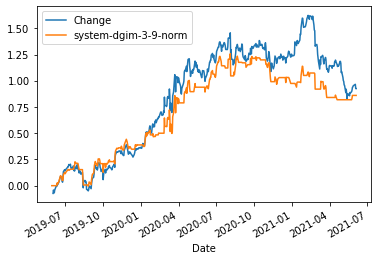

In [37]:
# Whether we are making money with this system
tdoc['system-dgim-3-9-norm'] = np.where(tdoc['position-dgim-3-9-norm'] > 0, tdoc['position-dgim-3-9-norm']* tdoc['Change'],0)
tdoc[['Change','system-dgim-3-9-norm']].cumsum().plot()
tdoc[['Change','system-dgim-3-9-norm']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-3-9
Date,,
2021-05-28,0.860266,0.248254
2021-06-01,0.860266,0.248254
2021-06-02,0.860266,0.248254
2021-06-03,0.860266,0.248254
2021-06-04,0.860266,0.248254


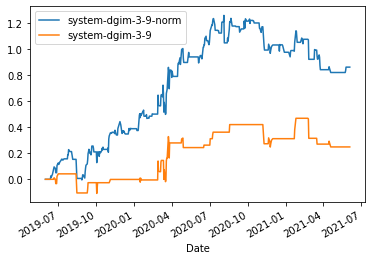

In [38]:
tdoc[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
tdoc[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

,system-dgim-3-9-norm,system-3-9
Date,,
2021-05-28,0.860266,1.608783
2021-06-01,0.860266,1.620535
2021-06-02,0.860266,1.623026
2021-06-03,0.860266,1.581928
2021-06-04,0.860266,1.581792


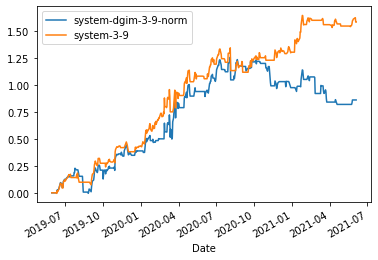

In [39]:
tdoc[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
tdoc[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

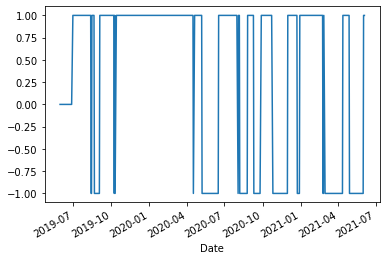

In [40]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position-dgim-9-21-norm'] = np.where(tdoc['9-day-dgim-norm'] > tdoc['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position-dgim-9-21-norm'] = np.where(tdoc['9-day-dgim-norm'] < tdoc['21-day-dgim-norm'],-1,tdoc['position-dgim-9-21-norm'])
tdoc['position-dgim-9-21-norm'].plot()

,Change,system-dgim-9-21-norm
Date,,
2021-05-28,0.951985,1.556460
2021-06-01,0.963736,1.556460
2021-06-02,0.966227,1.558951
2021-06-03,0.925130,1.517854
2021-06-04,0.924993,1.517717


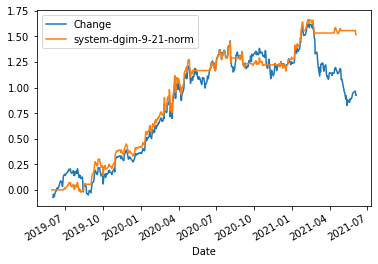

In [41]:
# Whether we are making money with this system
tdoc['system-dgim-9-21-norm'] = np.where(tdoc['position-dgim-9-21-norm'] > 0, tdoc['position-dgim-9-21-norm']* tdoc['Change'],0)
tdoc[['Change','system-dgim-9-21-norm']].cumsum().plot()
tdoc[['Change','system-dgim-9-21-norm']].cumsum().tail()

,system-dgim-9-21-norm,system-dgim-9-21
Date,,
2021-05-28,1.556460,0.800667
2021-06-01,1.556460,0.800667
2021-06-02,1.558951,0.800667
2021-06-03,1.517854,0.800667
2021-06-04,1.517717,0.800667


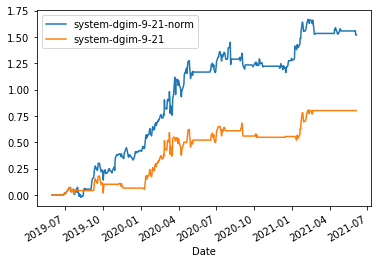

In [42]:
tdoc[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
tdoc[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

,system-dgim-9-21-norm,system-9-21
Date,,
2021-05-28,1.556460,1.078037
2021-06-01,1.556460,1.078037
2021-06-02,1.558951,1.080528
2021-06-03,1.517854,1.039431
2021-06-04,1.517717,1.039294


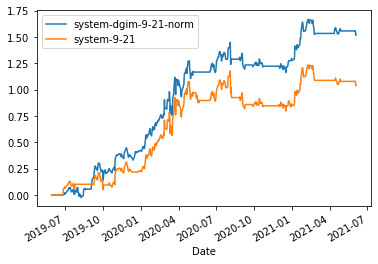

In [43]:
tdoc[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
tdoc[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-9-21-norm
Date,,
2021-05-28,0.860266,1.556460
2021-06-01,0.860266,1.556460
2021-06-02,0.860266,1.558951
2021-06-03,0.860266,1.517854
2021-06-04,0.860266,1.517717


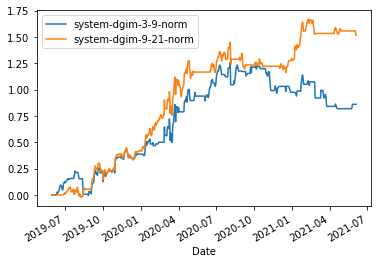

In [44]:
tdoc[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
tdoc[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()

## Winning Method: 3-9 Moving Average
### Runner Up: 9-21 Normalized DGIM Moving Average

,Change,system-dgim-3-9-norm,system-3-9,system-dgim-9-21-norm,system-9-21
Date,,,,,
2021-05-28,0.951985,0.860266,1.608783,1.556460,1.078037
2021-06-01,0.963736,0.860266,1.620535,1.556460,1.078037
2021-06-02,0.966227,0.860266,1.623026,1.558951,1.080528
2021-06-03,0.925130,0.860266,1.581928,1.517854,1.039431
2021-06-04,0.924993,0.860266,1.581792,1.517717,1.039294


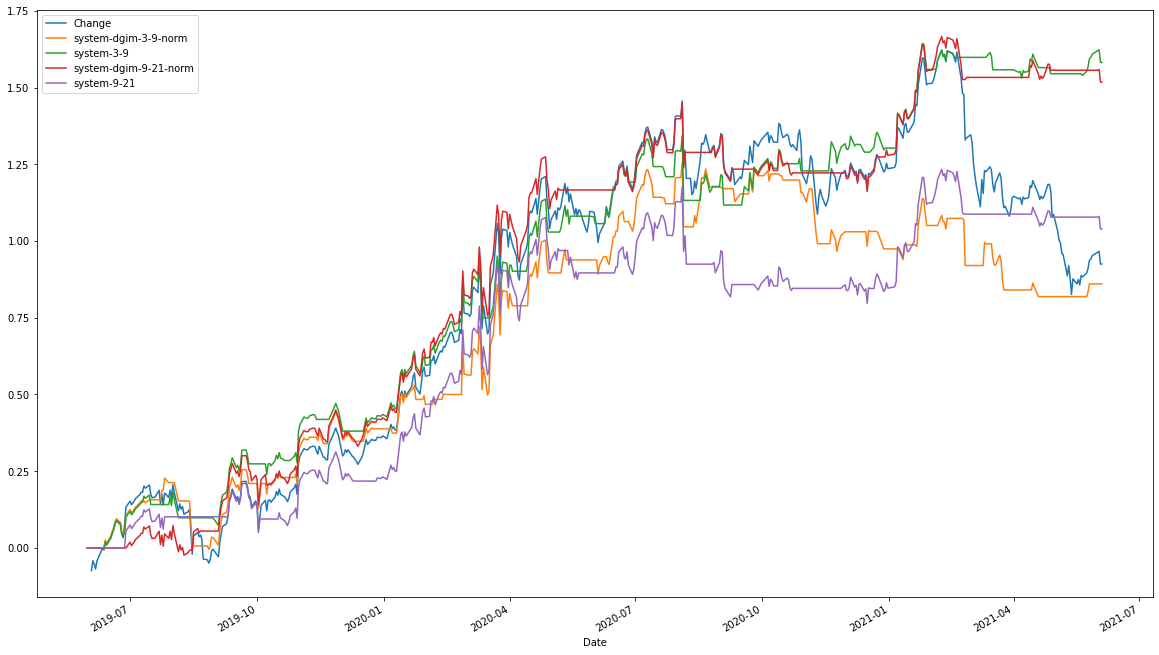

In [45]:
tdoc[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().plot(figsize=(20,12))
tdoc[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().tail()